In [36]:
import json
import pandas as pd

myPath = "../data/tqa_train_val_test/train/tqa_v1_train.json"
# Load the JSON file
with open(myPath) as f:
    data = json.load(f)

# Check the first few records
print(data[0])  # or use pd.DataFrame(data).head() for a tabular view

{'adjunctTopics': {'Apply Concepts': {'content': {'figures': [], 'mediaLinks': [], 'text': '5. A glacier is melting. What are all of the scientists you can think of who might be involved in studying this glacier? What would each of them do? '}, 'orderID': 't_12'}, 'Introduction': {'content': {'figures': [{'caption': 'FIGURE 1.10 Earth as seen from Apollo 17.', 'imagePath': 'textbook_images/earth_science_and_its_branches_20010.png'}], 'mediaLinks': [], 'text': 'Earth Science is the study of all aspects of our planet Earth. Earth Science is not just about the molten lava, icy mountain peaks, steep canyons and towering waterfalls of the continents. Earth Science includes the atmosphere and oceans. The field also looks out into the solar system, galaxy, and universe. Earth scientists seek to understand the beautiful planet on which we depend (Figure 1.10). Different branches of Earth Science study one particular part of Earth. Since all of the branches are connected, specialists work toget

In [4]:
from pandas import json_normalize

# Flatten the JSON structure
flattened_data = json_normalize(data, sep='_')
print(flattened_data.head())

  globalID                               lessonName  \
0   L_0002           earth science and its branches   
1   L_0003  erosion and deposition by flowing water   
2   L_0004          erosion and deposition by waves   
3   L_0006       erosion and deposition by glaciers   
4   L_0008                                  fossils   

  adjunctTopics_Apply Concepts_content_figures  \
0                                           []   
1                                           []   
2                                           []   
3                                           []   
4                                           []   

  adjunctTopics_Apply Concepts_content_mediaLinks  \
0                                              []   
1                                              []   
2                                              []   
3                                              []   
4                                              []   

           adjunctTopics_Apply Concepts_content_t

In [5]:
lesson_count = len(data)
print(f"Number of lessons: {lesson_count}")

Number of lessons: 666


In [6]:
non_diagram_q_count = sum(len(lesson['questions']['nonDiagramQuestions']) for lesson in data)
diagram_q_count = sum(len(lesson['questions']['diagramQuestions']) for lesson in data)
print(f"Non-Diagram Questions: {non_diagram_q_count}")
print(f"Diagram Questions: {diagram_q_count}")

Non-Diagram Questions: 8653
Diagram Questions: 6501


In [7]:
topic_count = sum(len(lesson.get('topics', {})) for lesson in data)
print(f"Total topics: {topic_count}")

Total topics: 3084


In [8]:
adjunct_topic_count = sum(len(lesson.get('adjunctTopics', {})) for lesson in data)
print(f"Total adjunct topics: {adjunct_topic_count}")

Total adjunct topics: 3333


In [9]:
instructional_diagram_count = sum(len(lesson.get('instructionalDiagrams', {})) for lesson in data)
print(f"Total instructional diagrams: {instructional_diagram_count}")

Total instructional diagrams: 185


In [10]:
annotation_count = sum(len(lesson.get('diagramAnnotations', {})) for lesson in data)
print(f"Total diagram annotations: {annotation_count}")

Total diagram annotations: 1096


In [11]:
from collections import Counter

answer_choices = []
for lesson in data:
    for question in lesson['questions']['nonDiagramQuestions'].values():
        answer_choices.extend(question['answerChoices'].keys())

answer_choice_counts = Counter(answer_choices)
print(f"Most common answer choices: {answer_choice_counts.most_common(5)}")

Most common answer choices: [('a', 8643), ('b', 8642), ('c', 5172), ('d', 5171), ('e', 1096)]


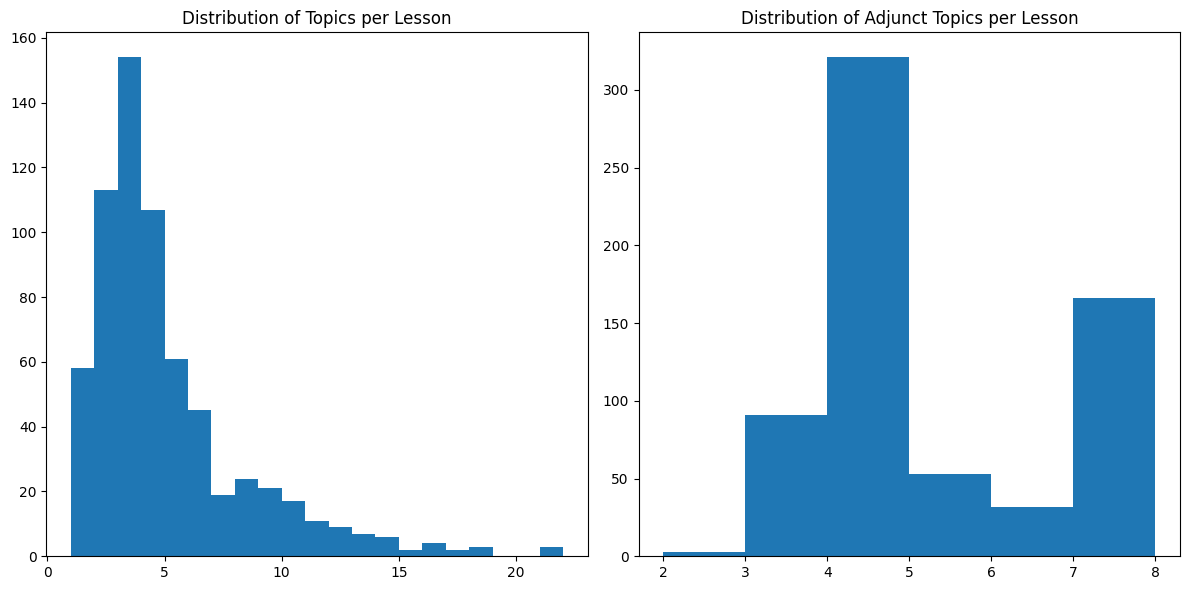

In [12]:
import matplotlib.pyplot as plt

lesson_lengths = [len(lesson.get('topics', {})) for lesson in data]
adjunct_lengths = [len(lesson.get('adjunctTopics', {})) for lesson in data]

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.hist(lesson_lengths, bins=range(min(lesson_lengths), max(lesson_lengths) + 1))
plt.title("Distribution of Topics per Lesson")

plt.subplot(1, 2, 2)
plt.hist(adjunct_lengths, bins=range(min(adjunct_lengths), max(adjunct_lengths) + 1))
plt.title("Distribution of Adjunct Topics per Lesson")

plt.tight_layout()
plt.show()

In [13]:
missing_data = {lesson['lessonName']: lesson.get('questions', None) for lesson in data if not lesson.get('questions')}
print(f"Lessons with missing questions: {len(missing_data)}")

Lessons with missing questions: 0


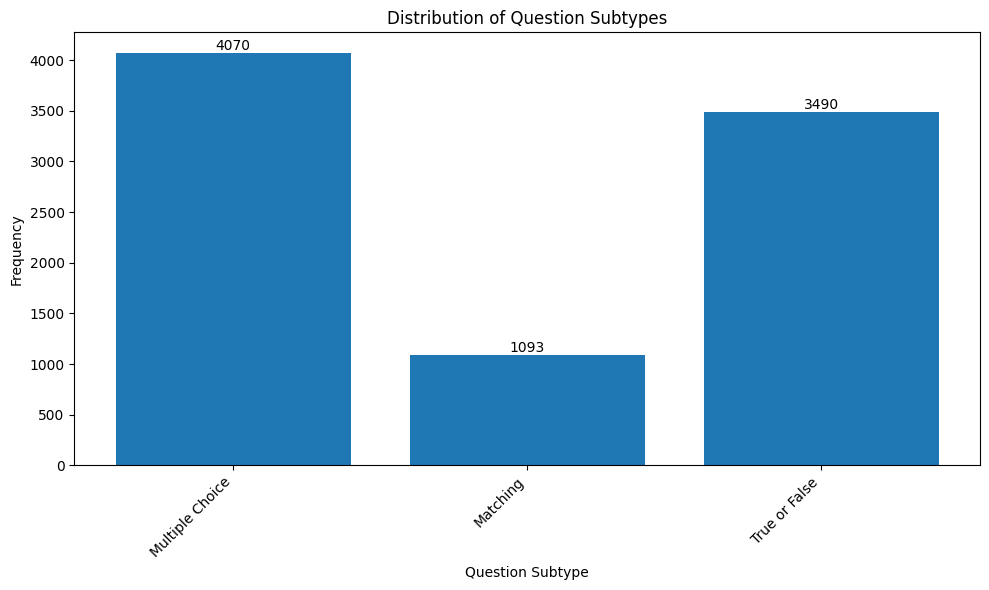

In [29]:
# Initialize a list to store the question subtypes
question_subtypes = []

# Loop through all the lessons and extract question subtypes
for lesson in data:
    if 'questions' in lesson:
        # Access nonDiagramQuestions
        non_diagram_questions = lesson['questions'].get('nonDiagramQuestions', {})
        
        # Loop through the questions in nonDiagramQuestions
        for question in non_diagram_questions.values():
            # Check if 'questionSubType' exists
            if 'questionSubType' in question:
                question_subtypes.append(question['questionSubType'])

# Count the frequency of each question subtype
subtype_counts = Counter(question_subtypes)

# Plot the distribution as a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(subtype_counts.keys(), subtype_counts.values())

# Annotate the bars with their respective values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Add title and labels
plt.title("Distribution of Question Subtypes")
plt.xlabel("Question Subtype")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to avoid clipping of labels

# Show the plot
plt.show()

In [34]:
def get_keys_structure(data, level=0):
    """Recursively extracts keys to show the hierarchical structure."""
    if isinstance(data, dict):
        for key, value in data.items():
            print("  " * level + f"- {key}")
            get_keys_structure(value, level + 1)
    elif isinstance(data, list) and len(data) > 0:
        print("  " * level + f"- (List of {len(data)} items)")
        get_keys_structure(data[0], level + 1)

print("Dataset Structure:")
get_keys_structure(data[0])  # Check structure for one lesson

Dataset Structure:
- adjunctTopics
  - Apply Concepts
    - content
      - figures
      - mediaLinks
      - text
    - orderID
  - Introduction
    - content
      - figures
        - (List of 1 items)
          - caption
          - imagePath
      - mediaLinks
      - text
    - orderID
  - Lesson Objectives
    - content
      - figures
      - mediaLinks
      - text
    - orderID
  - Lesson Summary
    - content
      - figures
        - (List of 1 items)
          - caption
          - imagePath
      - mediaLinks
      - text
    - orderID
  - Points to Consider
    - content
      - figures
      - mediaLinks
      - text
    - orderID
  - Recall
    - content
      - figures
      - mediaLinks
      - text
    - orderID
  - Think Critically
    - content
      - figures
      - mediaLinks
      - text
    - orderID
  - Vocabulary
    - astronomy
    - geology
    - meteorology
    - oceanography
- diagramAnnotations
- globalID
- instructionalDiagrams
- lessonName
- question

'Multiple Choice'